In [42]:
import matplotlib.pyplot as plt
from math import cos, radians
import numpy as np
import pandas as pd

def plot_distribution(file_names, robbins=False):
    folder_path = 'distribution'
    resolution = 593
    bins = np.logspace(0, 1, 40, base=593)
    plt.figure(figsize=(12,8))

    for file_name in file_names:

        size_list = []

        f = open(folder_path + '/' + file_name)

        w_scale = 1

        model_name = file_name[:-4]

        for line in f.read().splitlines():
            xs = line.split()
            if len(xs) < 4:
                lat = int(line.split('_')[0])
                w_scale = cos(radians(lat))
            else:
                w, h = line.split()[3: 5]
                w = float(w) * resolution * w_scale
                h = float(h) * resolution
                size_list.append(max(w, h))
        f.close()
        y, x = np.histogram(size_list, bins=bins)
        x = (x[1:] * x[:-1])**0.5
        plt.loglog(x, y, label=model_name)

        print(file_name)
        print('Number of craters:', len(size_list))
        print('Craters per image:', len(size_list) / 21600)

    if robbins:
        robbins = pd.read_csv('Robbins_essential.csv')
        index = (robbins['LATITUDE_CIRCLE_IMAGE'] < 30) & (robbins['LATITUDE_CIRCLE_IMAGE'] > -30) & (robbins['DIAM_CIRCLE_IMAGE'] < resolution/10)
        size_list = robbins['DIAM_CIRCLE_IMAGE'][index]
        size_list *= 10
        y, x = np.histogram(size_list, bins=bins)
        x = (x[1:] * x[:-1])**0.5
        plt.loglog(x, y, label='Robbins')
        print('Robbins')
        print('Number of craters:', len(size_list))
        print('Craters per image:', len(size_list) / 21600)
    
    plt.ylabel('count')
    plt.xlabel('crater size (km)')
    ticks = [1, 5, 10, 50, 100, 500]
    labels = ['%.1f'%(x/10) for x in ticks]
    plt.xticks(ticks, labels=labels)
    plt.legend()
    plt.grid(True)
    plt.show()

step4_m1.txt
Number of craters: 212847
Craters per image: 9.854027777777778
step4_2e_5.txt
Number of craters: 222311
Craters per image: 10.292175925925926
step4_2e_10.txt
Number of craters: 319686
Craters per image: 14.800277777777778
step4_2e_15.txt
Number of craters: 333134
Craters per image: 15.42287037037037
step4_2e_20.txt
Number of craters: 393061
Craters per image: 18.19726851851852
Robbins
Number of craters: 224624
Craters per image: 10.39925925925926


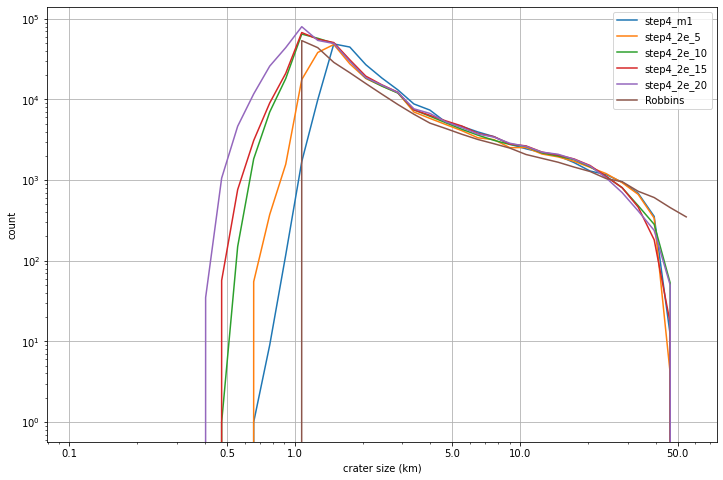

In [43]:
file_names = ['step4_m1.txt', 'step4_2e_5.txt', 'step4_2e_10.txt', 'step4_2e_15.txt', 'step4_2e_20.txt']
plot_distribution(file_names, True)

step4_2a.txt
Number of craters: 146751
Craters per image: 6.794027777777778
step4_2b.txt
Number of craters: 278517
Craters per image: 12.894305555555556
step4_2c.txt
Number of craters: 138857
Craters per image: 6.4285648148148145
step4_2d.txt
Number of craters: 282550
Craters per image: 13.081018518518519
step4_2e_20.txt
Number of craters: 393061
Craters per image: 18.19726851851852


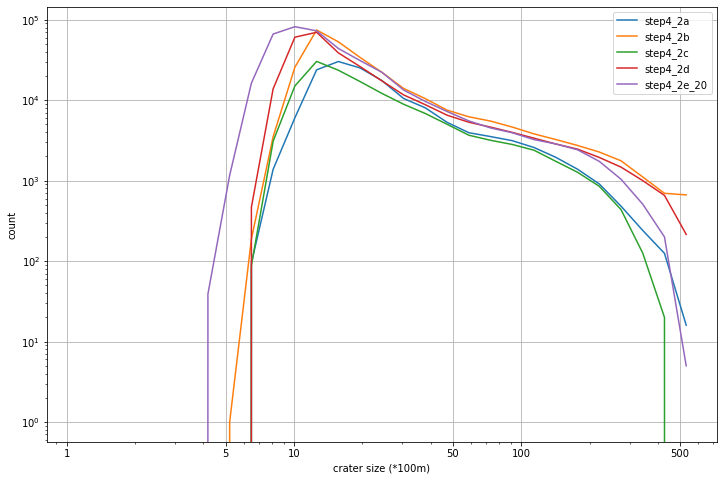

In [31]:
file_names = ['step4_2a.txt', 'step4_2b.txt', 'step4_2c.txt', 'step4_2d.txt', 'step4_2e_20.txt']
plot_distribution(file_names)

step4_trail.txt
Number of craters: 284693
Craters per image: 13.180231481481481
step4_m1.txt
Number of craters: 212847
Craters per image: 9.854027777777778
Robbins
Number of craters: 224624
Craters per image: 10.39925925925926


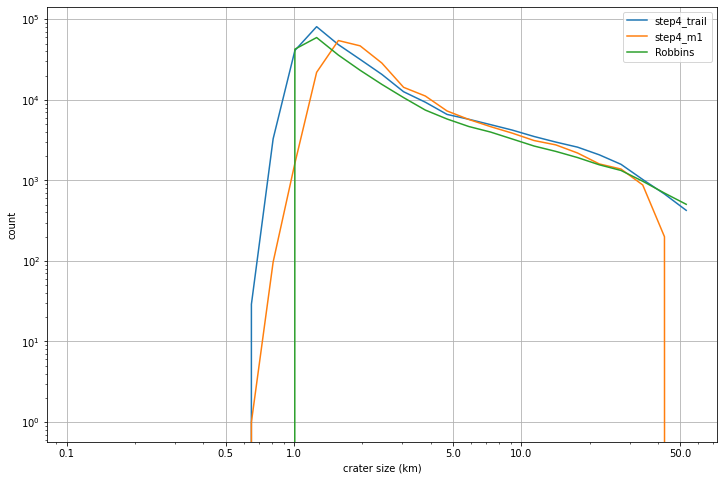

In [36]:
plot_distribution(['step4_trail.txt', 'step4_m1.txt'], True)